<a href="https://colab.research.google.com/github/mtiarajlgita/text-mining/blob/main/textmining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests beautifulsoup4 nltk wordcloud matplotlib PySastrawi -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.2 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords', quiet=True)


True

In [ ]:
# URL artikel yang akan di-scrape
url = "https://ukmorbituinbkt.com/artikel/milad-ukm-orbit-ke-10-tahun-:-10-years-of-orbiting-making-a-breakthrough,-creating-change"

def scrape_text_from_url(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers, timeout=15)
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    return ' '.join([p.get_text(separator=' ', strip=True) for p in paragraphs])

def preprocess_text(text, use_stemming=True):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+|\S+@\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()

    stop_words = set(stopwords.words('indonesian'))
    additional_stops = {'url', 'http', 'https', 'com', 'org', 'www', 'nbsp', 'dengan',
                        'akan', 'yang', 'dan', 'di', 'ke', 'ini', 'itu', 'juga', 'adalah', 'oleh'}
    stop_words.update(additional_stops)

    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]

    if use_stemming:
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        tokens = [stemmer.stem(w) for w in tokens]

    return ' '.join(tokens)

def generate_wordcloud(text, title="WordCloud"):
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        max_words=200,
        colormap='tab20b',
        random_state=42,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, pad=20)
    plt.tight_layout()
    plt.show()
    wordcloud.to_file("wordcloud_result.png")

def show_top_words(text, n=10):
    words = text.split()
    counter = Counter(words)
    print(f"\nTop {n} kata yang paling sering muncul:")
    for word, freq in counter.most_common(n):
        print(f"{word}: {freq}")


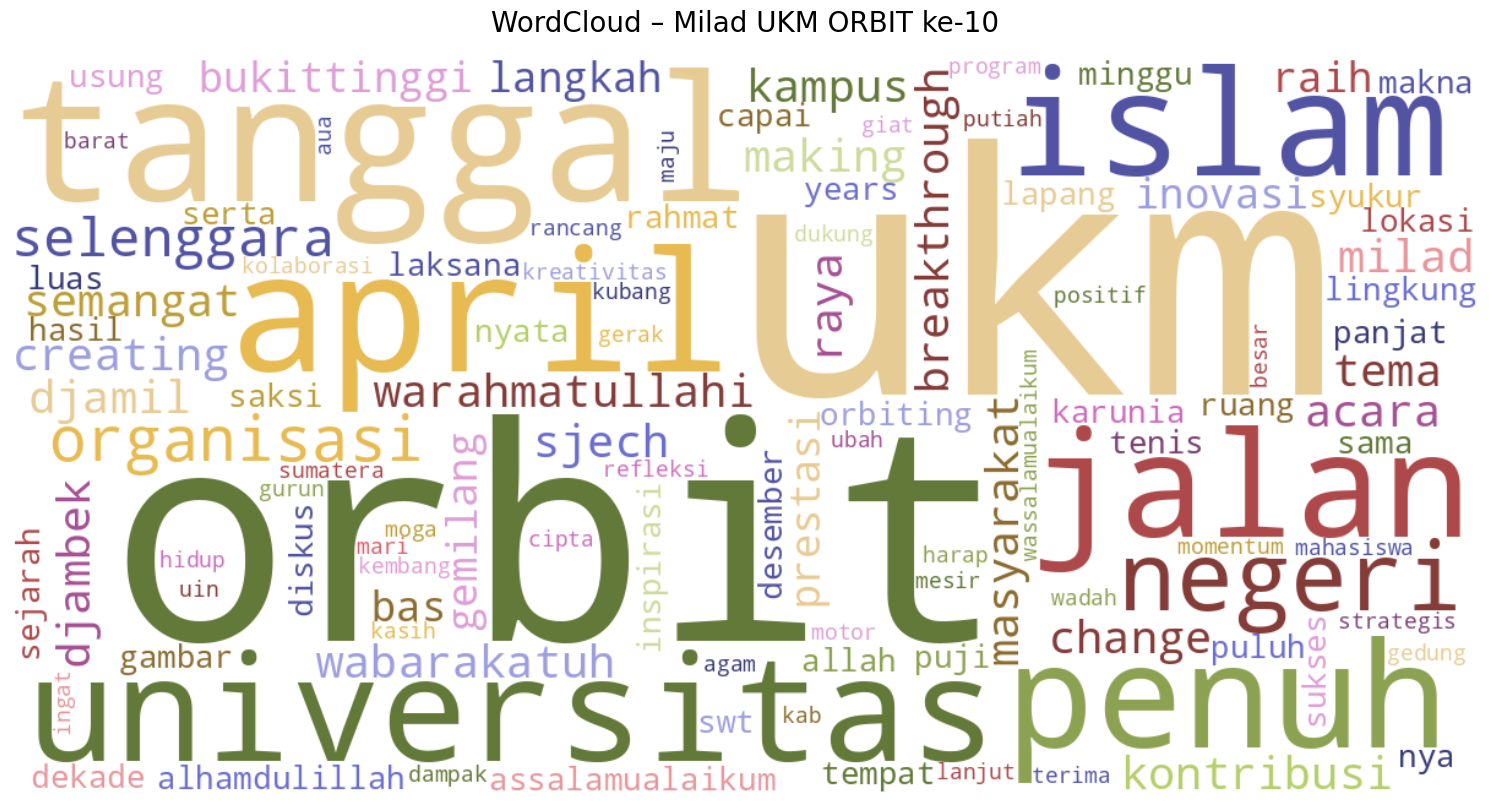


Top 15 kata yang paling sering muncul:
ukm: 9
orbit: 7
tanggal: 4
april: 4
penuh: 3
jalan: 3
universitas: 3
islam: 3
negeri: 3
organisasi: 3
selenggara: 3
warahmatullahi: 2
wabarakatuh: 2
milad: 2
raya: 2


In [ ]:
raw_text = scrape_text_from_url(url)
clean_text = preprocess_text(raw_text)

generate_wordcloud(clean_text, title="WordCloud – Milad UKM ORBIT ke-10")
show_top_words(clean_text, n=15)
